In [1]:
!python xmlconversion.py --verbose

images/Car02.xml
images/Car119.xml
images/Car84.xml
images/Car117.xml
images/Car107.xml
images/LoxodontaAfricana028.xml
images/Car121.xml
images/LoxodontaAfricana091.xml
images/Car47.xml
images/Car53.xml
images/Car122.xml
images/LoxodontaAfricana088.xml
images/Car148.xml
images/Car22.xml
images/Car128.xml
images/Car58.xml
images/LoxodontaAfricana047.xml
images/Car06.xml
images/Car64.xml
images/Car34.xml
images/Car52.xml
images/Car120.xml
images/LoxodontaAfricana014.xml
images/LoxodontaAfricana060.xml
images/LoxodontaAfricana078.xml
images/Car68.xml
images/Car138.xml
images/Car13.xml
images/LoxodontaAfricana094.xml
images/LoxodontaAfricana015.xml
images/Car63.xml
images/Car18.xml
images/LoxodontaAfricana007.xml
images/Car151.xml
images/Car105.xml
images/Car62.xml
images/Car675.xml
images/LoxodontaAfricana039.xml
images/LoxodontaAfricana011.xml
images/LoxodontaAfricana066.xml
images/LoxodontaAfricana033.xml
images/Car59.xml
images/LoxodontaAfricana098.xml
images/LoxodontaAfricana069.xml


In [2]:
!python partition_dataset.py -x -i ./images -r 0.1

In [3]:
!code './data/label_map.pbtxt'

In [3]:
!python generate_tfrecord.py -x images/train -l data/label_map.pbtxt -o data/train.record

Successfully created the TFRecord file: data/train.record


In [4]:
!python generate_tfrecord.py -x images/test -l data/label_map.pbtxt -o data/test.record

Successfully created the TFRecord file: data/test.record


In [5]:
PATH_TO_MODEL = "faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8"

In [8]:
!code './training/TF2/training/'{PATH_TO_MODEL}'/pipeline.config'

In [8]:
!python model_main_tf2.py --model_dir=training/TF2/training/{PATH_TO_MODEL} --pipeline_config_path=training/TF2/training/{PATH_TO_MODEL}/pipeline.config --num_train_steps=5000 --alsologtostderr

2022-12-05 14:06:27.393052: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-12-05 14:06:28.621861: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-12-05 14:06:28.673569: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 14:06:28.674032: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.755GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2022-12-05 14:06:28.674048: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-12-05 14:06:28.675519: I tensorflow/stream_executor/

In [9]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path ./training/TF2/training/{PATH_TO_MODEL}/pipeline.config --trained_checkpoint_dir ./training/TF2/training/{PATH_TO_MODEL}/ --output_directory ./training/TF2/training/{PATH_TO_MODEL}/saved_model/

2022-12-05 14:14:34.615310: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-12-05 14:14:35.686216: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-12-05 14:14:35.730066: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 14:14:35.730507: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.755GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2022-12-05 14:14:35.730524: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-12-05 14:14:35.732020: I tensorflow/stream_executor/

In [10]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pathlib
import tensorflow as tf

tf.get_logger().setLevel('ERROR')
# Suppress TensorFlow logging (1)
# Suppress TensorFlow logging (2)
# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
IMAGE_PATHS = 'test_images/'

In [11]:
PATH_TO_MODEL_DIR = './training/TF2/training/' + PATH_TO_MODEL + '/saved_model/saved_model/'
PATH_TO_MODEL_DIR

'./training/TF2/training/faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/saved_model/saved_model/'

In [12]:
PATH_TO_LABELS = './data/label_map.pbtxt'

In [13]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR
print('Loading model...', end='')
start_time = time.time()
# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)
end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 7.211643695831299 seconds


In [14]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Running inference for test_images/Car1.jpg... Done
Running inference for test_images/Elephant2.jpg... Done
Running inference for test_images/Car2.jpg... Done
Running inference for test_images/Elephant1.jpg... Done


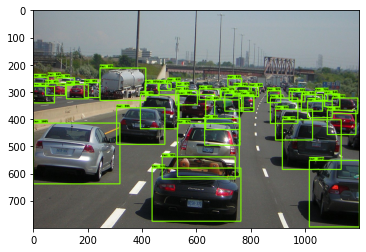

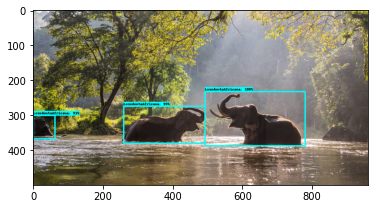

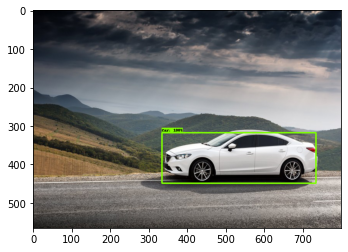

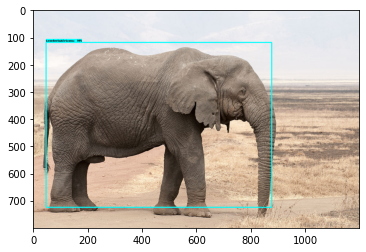

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')
# Suppress Matplotlib warnings
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
    path: the file path to the image
    Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

for image_path in os.listdir(IMAGE_PATHS):
    image_path = os.path.join(IMAGE_PATHS, image_path)
    print('Running inference for {}... '.format(image_path), end='')
    image_np = load_image_into_numpy_array(image_path)
    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()
    # Convert image to grayscale
    # image_np = np.tile(
    #
    # np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)
    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]
    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)
    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimensi
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
    detections['num_detections'] = num_detections
    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(int)
    image_np_with_detections = image_np.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=0.60,
        agnostic_mode=False)
    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()